# **Ground-based cloud classification** using CNNs

<hr>

_Final Master Thesis - Marcos Plaza_

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime
import warnings
import random
warnings.filterwarnings('ignore')
import imageio
from skimage import transform,io, exposure
import keras
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, UpSampling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, TensorBoard
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import math
from sklearn.model_selection import train_test_split
import pickle
from tensorflow.keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from PIL import Image, ImageEnhance
from sklearn import preprocessing

### Load CCSN dataset

In [2]:
def get_dummies(labels, class_name, index):
    dummy_arr = np.zeros((len(labels)))
    dummy_arr[index] += 1
    return dummy_arr

def load_and_split_data(n_channels, data_aug_level=0, random_gamma=False, avoid_classes=list):
    N = 0
    labels = []

    for dirname, _, filenames in os.walk('./train/'):
        for filename in filenames:
            path = os.path.join(dirname, filename)
            splits = dirname.split('/')
            N += 1
            class_name = splits[-1]

            if class_name not in labels and class_name != '':
                labels.append(class_name)

    labels = np.unique(labels)

    count = 0

    im_size = 227

    X = np.zeros((N, im_size, im_size, n_channels))
    y = np.zeros((N, len(labels)))

    for dirname, _, filenames in os.walk('./train/'):
        for filename in filenames:
            if filename == '.DS_Store': continue

            path = os.path.join(dirname, filename)        
            l = path.split('/')[-2]

            im = imageio.imread(path)/255.
            X[count, :, :] = transform.resize(im, (im_size, im_size, n_channels), mode='symmetric', preserve_range=True)
            
            #if l not in avoid_classes:
            y[count, :] = get_dummies(labels, l, np.where(labels == l)[0][0])

            count +=1
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
    
    del X
    del y
    
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
    
    
    N=X_train.shape[0]
    
    if data_aug_level >= 1:
        # create data generator
        datagen = ImageDataGenerator(
            horizontal_flip=True, # horizontal flip
            brightness_range=[0.85,1.25], # brightness
            zoom_range=[0.85,1.0])

        # fit parameters from data
        datagen.fit(X_train)

        X2 = np.zeros((N, im_size, im_size, n_channels))
        y2 = np.zeros((N, len(labels)))

        # Configure batch size and retrieve one batch of images
        for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=N):
            for i in range(0, N, 1):
                X2[i,:,:,:] = X_batch[i].reshape(im_size,im_size, n_channels)/255.
                y2[i] = y_batch[i]
            # De esta manera paramos de generar imagenes aleatoriamente
            break
            
        X_train = np.concatenate((X_train,X2))
        y_train = np.concatenate((y_train,y2))
            
    if data_aug_level >= 2:
        X3 = np.zeros((N, im_size, im_size, n_channels))
        y3 = np.zeros((N, len(labels)))

        # Configure batch size and retrieve one batch of images
        for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=N):
            for i in range(0, N, 1):
                X3[i,:,:,:] = X_batch[i].reshape(im_size,im_size, n_channels)/255.
                y3[i] = y_batch[i]
            # De esta manera paramos de generar imagenes aleatoriamente
            break
        
        X_train = np.concatenate((X_train,X3))
        y_train = np.concatenate((y_train,y3))
    
    if data_aug_level >= 3:
        X4 = np.zeros((N, im_size, im_size, n_channels))
        y4 = np.zeros((N, len(labels)))

        # Configure batch size and retrieve one batch of images
        for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=N):
            for i in range(0, N, 1):
                X4[i,:,:,:] = X_batch[i].reshape(im_size,im_size, n_channels)/255.
                y4[i] = y_batch[i]
            # De esta manera paramos de generar imagenes aleatoriamente
            break
            
        X_train = np.concatenate((X_train,X4))
        y_train = np.concatenate((y_train,y4))

    if data_aug_level >= 4:
        X5 = np.zeros((N, im_size, im_size, n_channels))
        y5 = np.zeros((N, len(labels)))

        # Configure batch size and retrieve one batch of images
        for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=N):
            for i in range(0, N, 1):
                X5[i,:,:,:] = X_batch[i].reshape(im_size,im_size, n_channels)/255.
                y5[i] = y_batch[i]
            # De esta manera paramos de generar imagenes aleatoriamente
            break

        X_train = np.concatenate((X_train,X5))
        y_train = np.concatenate((y_train,y5))
        
    if data_aug_level >= 5:
        X6 = np.zeros((N, im_size, im_size, n_channels))
        y6 = np.zeros((N, len(labels)))

        # Configure batch size and retrieve one batch of images
        for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=N):
            for i in range(0, N, 1):
                X6[i,:,:,:] = X_batch[i].reshape(im_size,im_size, n_channels)/255.
                y6[i] = y_batch[i]
            # De esta manera paramos de generar imagenes aleatoriamente
            break

        X_train = np.concatenate((X_train,X6))
        y_train = np.concatenate((y_train,y6))
        
    if data_aug_level >= 6:
        X7 = np.zeros((N, im_size, im_size, n_channels))
        y7 = np.zeros((N, len(labels)))

        # Configure batch size and retrieve one batch of images
        for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=N):
            for i in range(0, N, 1):
                X7[i,:,:,:] = X_batch[i].reshape(im_size,im_size, n_channels)/255.
                y7[i] = y_batch[i]
            # De esta manera paramos de generar imagenes aleatoriamente
            break

        X_train = np.concatenate((X_train,X7))
        y_train = np.concatenate((y_train,y7))
        
    if data_aug_level >= 7:
        X8 = np.zeros((N, im_size, im_size, n_channels))
        y8 = np.zeros((N, len(labels)))

        # Configure batch size and retrieve one batch of images
        for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=N):
            for i in range(0, N, 1):
                X8[i,:,:,:] = X_batch[i].reshape(im_size,im_size, n_channels)/255.
                y8[i] = y_batch[i]
            # De esta manera paramos de generar imagenes aleatoriamente
            break

        X_train = np.concatenate((X_train,X8))
        y_train = np.concatenate((y_train,y8))
        
    if data_aug_level >= 8:
        X9 = np.zeros((N, im_size, im_size, n_channels))
        y9 = np.zeros((N, len(labels)))

        # Configure batch size and retrieve one batch of images
        for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=N):
            for i in range(0, N, 1):
                X9[i,:,:,:] = X_batch[i].reshape(im_size,im_size, n_channels)/255.
                y9[i] = y_batch[i]
            # De esta manera paramos de generar imagenes aleatoriamente
            break

        X_train = np.concatenate((X_train,X9))
        y_train = np.concatenate((y_train,y9))
        
    if data_aug_level >= 9:
        X10 = np.zeros((N, im_size, im_size, n_channels))
        y10 = np.zeros((N, len(labels)))

        # Configure batch size and retrieve one batch of images
        for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=N):
            for i in range(0, N, 1):
                X10[i,:,:,:] = X_batch[i].reshape(im_size,im_size, n_channels)/255.
                y10[i] = y_batch[i]
            # De esta manera paramos de generar imagenes aleatoriamente
            break

        X_train = np.concatenate((X_train,X10))
        y_train = np.concatenate((y_train,y10))

    if random_gamma:
        for img in X_train:
            img = exposure.adjust_gamma(img, random.choice([1, 0.75, 1.25]))
                
    # display some information
    print("X_train shape: ", X_train.shape)
    print("y_train shape: ", y_train.shape)
    print("X_test shape: ", X_test.shape)
    print("y_test shape: ", y_test.shape)
    print("X_val shape: ", X_val.shape)
    print("y_val shape: ", y_val.shape)
    
    return X_train, X_val, X_test, y_train, y_val, y_test, labels

In [51]:
def get_dummies(labels, class_name, index):
    dummy_arr = np.zeros((len(labels)))
    dummy_arr[index] += 1
    return dummy_arr

def load_and_split_data_2(n_channels, data_aug_level=0):
    aux = {'Sc':'Sc', 'Ac':'Cc&Ac', 'Ns':'St&As&Ns', 'Ci':'Ci&Cs&Ct', 'Cu':'Cu', 'Cs':'Ci&Cs&Ct',\
           'Ct':'Ci&Cs&Ct', 'St':'St&As&Ns', 'As':'St&As&Ns', 'Cc':'Cc&Ac', 'Cb':'Cb', '':''}
    N = 0
    labels = []

    for dirname, _, filenames in os.walk('./train/'):
        for filename in filenames:
            path = os.path.join(dirname, filename)
            splits = dirname.split('/')
            class_name = aux[splits[-1]]

            if class_name != '':
                N += 1
                labels.append(class_name)

    count = 0

    im_size = 227

    X = np.zeros((N, im_size, im_size, n_channels))

    for dirname, _, filenames in os.walk('./train/'):
        for filename in filenames:
            if filename == '.DS_Store': continue

            path = os.path.join(dirname, filename)        
            l = path.split('/')[-2]

            im = imageio.imread(path)/255.
            X[count, :, :] = transform.resize(im, (im_size, im_size, n_channels), mode='symmetric', preserve_range=True)

            count +=1
            
    y = preprocessing.label_binarize(labels, classes=list(np.unique(labels)))
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
    
    del X
    del y
    
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
    
    
    N=X_train.shape[0]
    
    if data_aug_level >= 1:
        # create data generator
        datagen = ImageDataGenerator(
            horizontal_flip=True, # horizontal flip
            brightness_range=[0.85,1.25], # brightness
            zoom_range=[0.85,1.0])

        # fit parameters from data
        datagen.fit(X_train)

        X2 = np.zeros((N, im_size, im_size, n_channels))
        y2 = np.zeros((N, len(labels)))

        # Configure batch size and retrieve one batch of images
        for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=N):
            for i in range(0, N, 1):
                X2[i,:,:,:] = X_batch[i].reshape(im_size,im_size, n_channels)/255.
                y2[i] = y_batch[i]
            # De esta manera paramos de generar imagenes aleatoriamente
            break
            
        X_train = np.concatenate((X_train,X2))
        y_train = np.concatenate((y_train,y2))
            
    if data_aug_level >= 2:
        X3 = np.zeros((N, im_size, im_size, n_channels))
        y3 = np.zeros((N, len(labels)))

        # Configure batch size and retrieve one batch of images
        for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=N):
            for i in range(0, N, 1):
                X3[i,:,:,:] = X_batch[i].reshape(im_size,im_size, n_channels)/255.
                y3[i] = y_batch[i]
            # De esta manera paramos de generar imagenes aleatoriamente
            break
        
        X_train = np.concatenate((X_train,X3))
        y_train = np.concatenate((y_train,y3))
    
    if data_aug_level >= 3:
        X4 = np.zeros((N, im_size, im_size, n_channels))
        y4 = np.zeros((N, len(labels)))

        # Configure batch size and retrieve one batch of images
        for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=N):
            for i in range(0, N, 1):
                X4[i,:,:,:] = X_batch[i].reshape(im_size,im_size, n_channels)/255.
                y4[i] = y_batch[i]
            # De esta manera paramos de generar imagenes aleatoriamente
            break
            
        X_train = np.concatenate((X_train,X4))
        y_train = np.concatenate((y_train,y4))

    if data_aug_level >= 4:
        X5 = np.zeros((N, im_size, im_size, n_channels))
        y5 = np.zeros((N, len(labels)))

        # Configure batch size and retrieve one batch of images
        for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=N):
            for i in range(0, N, 1):
                X5[i,:,:,:] = X_batch[i].reshape(im_size,im_size, n_channels)/255.
                y5[i] = y_batch[i]
            # De esta manera paramos de generar imagenes aleatoriamente
            break

        X_train = np.concatenate((X_train,X5))
        y_train = np.concatenate((y_train,y5))
        
                
    # display some information
    print("X_train shape: ", X_train.shape)
    print("y_train shape: ", y_train.shape)
    print("X_test shape: ", X_test.shape)
    print("y_test shape: ", y_test.shape)
    print("X_val shape: ", X_val.shape)
    print("y_val shape: ", y_val.shape)
    
    return X_train, X_val, X_test, y_train, y_val, y_test, labels

In [52]:
n_channels=3

In [53]:
X_train, X_val, X_test, y_train, y_val, y_test, labels = load_and_split_data_2(n_channels, data_aug_level=0)

X_train shape:  (1138, 227, 227, 3)
y_train shape:  (1138, 6)
X_test shape:  (488, 227, 227, 3)
y_test shape:  (488, 6)
X_val shape:  (697, 227, 227, 3)
y_val shape:  (697, 6)


In [54]:
np.unique(labels)

array(['Cb', 'Cc&Ac', 'Ci&Cs&Ct', 'Cu', 'Sc', 'St&As&Ns'], dtype='<U8')

### Load SWIMCAT dataset (only 6 different classes)

In [34]:
len("./Swimcat-extend/")

17

In [18]:
labels = []
im_size = 227
n_channels = 3
X = np.zeros((2100, im_size, im_size, n_channels))

count = 0

for dirname, _, filenames in os.walk('./Swimcat-extend/'):
    for filename in filenames:
        if filename == '.DS_Store': continue

        path = os.path.join(dirname, filename)  
                
        label = dirname[17:]
        labels.append(label)
            
        im = imageio.imread(path)/255.
        X[count, :, :] = transform.resize(im, (im_size, im_size, n_channels), mode='symmetric', preserve_range=True)
        
        count += 1    

In [19]:
from sklearn import preprocessing

y = preprocessing.label_binarize(labels, classes=list(np.unique(labels)))

In [22]:
y

array([[0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

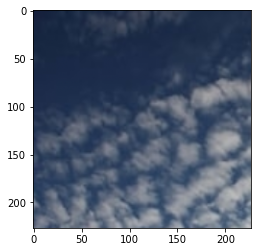

In [4]:
plt.imshow(X[0])

### Split into train/val/test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# display some information
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)

X_train shape:  (1181, 227, 227, 3)
y_train shape:  (1181, 6)
X_test shape:  (525, 227, 227, 3)
y_test shape:  (525, 6)
X_val shape:  (394, 227, 227, 3)
y_val shape:  (394, 6)


In [55]:
#@title Learning rate schedulers
class LearningRateDecay:
    def plot(self, epochs, title="Learning Rate Schedule"):
        # compute the set of learning rates for each corresponding
        # epoch
        lrs = [self(i) for i in epochs]
        # the learning rate schedule
        plt.style.use("ggplot")
        plt.figure()
        plt.plot(epochs, lrs)
        plt.title(title)
        plt.xlabel("Epoch #")
        plt.ylabel("Learning Rate")
        
class StepDecay(LearningRateDecay):
    def __init__(self, initAlpha=1e-5, factor=0.5, dropEvery=10):
        # store the base initial learning rate, drop factor, and
        # epochs to drop every
        self.initAlpha = initAlpha
        self.factor = factor
        self.dropEvery = dropEvery
        
    def __call__(self, epoch):
        # compute the learning rate for the current epoch
        exp = np.floor((1 + epoch) / self.dropEvery)
        alpha = self.initAlpha * (self.factor ** exp)
        
        # return the learning rate
        return float(alpha)

In [7]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LayerNormalization

model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=64, input_shape=(227,227,n_channels), kernel_size=(11,11), strides=(4,4), padding='valid', activation='relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Passing it to a dense layer
model.add(Flatten())

# Add Dropout to prevent overfitting
model.add(Dropout(0.5))

# Dense Layer
model.add(Dense(units=256, activation='relu'))

# Output Layer 
model.add(Dense(units=6, activation='softmax'))

model.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 64)        23296     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPo

2022-05-16 15:05:21.281174: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-16 15:05:21.281481: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
initial_lr = 1e-3

#compile model using accuracy to measure model performance
model.compile(loss='categorical_crossentropy', 
              optimizer= SGD(learning_rate=initial_lr,momentum=0.9), metrics=['accuracy'])

In [9]:
epochs = 200
batch_size = 8 # todo set to 64
steps_per_epoch = len(X_train)//batch_size
validation_steps = len(X_val)//batch_size

checkpoint = ModelCheckpoint("./Models/SwimCat_Pretrain.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

# lr scheduler not used
lr_scheduler = LearningRateScheduler(StepDecay(initAlpha=initial_lr, factor=0.6, dropEvery=20), verbose=1)

In [10]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=epochs,
    batch_size=batch_size,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint, early])

2022-05-11 15:16:42.631246: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-11 15:16:42.631440: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-11 15:16:42.809957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/200
147/147 [==============================] - ETA: 0s - loss: 1.6392 - accuracy: 0.2866

2022-05-11 15:16:46.384149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


147/147 [==============================] - 4s 26ms/step - loss: 1.6392 - accuracy: 0.2866 - val_loss: 1.3843 - val_accuracy: 0.4694

Epoch 00001: val_accuracy improved from -inf to 0.46939, saving model to ./Models/SwimCat_Pretrain.h5
Epoch 2/200
147/147 [==============================] - 2s 14ms/step - loss: 1.2581 - accuracy: 0.5320 - val_loss: 1.2740 - val_accuracy: 0.6097

Epoch 00002: val_accuracy improved from 0.46939 to 0.60969, saving model to ./Models/SwimCat_Pretrain.h5
Epoch 3/200
147/147 [==============================] - 2s 14ms/step - loss: 1.0411 - accuracy: 0.6539 - val_loss: 0.9578 - val_accuracy: 0.6684

Epoch 00003: val_accuracy improved from 0.60969 to 0.66837, saving model to ./Models/SwimCat_Pretrain.h5
Epoch 4/200
147/147 [==============================] - 2s 14ms/step - loss: 0.8459 - accuracy: 0.7187 - val_loss: 0.8298 - val_accuracy: 0.6888

Epoch 00004: val_accuracy improved from 0.66837 to 0.68878, saving model to ./Models/SwimCat_Pretrain.h5
Epoch 5/200
147

147/147 [==============================] - 2s 14ms/step - loss: 0.0249 - accuracy: 0.9932 - val_loss: 0.3319 - val_accuracy: 0.9362

Epoch 00038: val_accuracy did not improve from 0.95408
Epoch 39/200
147/147 [==============================] - 2s 14ms/step - loss: 0.0265 - accuracy: 0.9906 - val_loss: 0.1955 - val_accuracy: 0.9490

Epoch 00039: val_accuracy did not improve from 0.95408
Epoch 40/200
147/147 [==============================] - 2s 14ms/step - loss: 0.0698 - accuracy: 0.9770 - val_loss: 0.3302 - val_accuracy: 0.9235

Epoch 00040: val_accuracy did not improve from 0.95408
Epoch 41/200
147/147 [==============================] - 2s 14ms/step - loss: 0.0531 - accuracy: 0.9847 - val_loss: 0.3079 - val_accuracy: 0.9133

Epoch 00041: val_accuracy did not improve from 0.95408
Epoch 42/200
147/147 [==============================] - 2s 14ms/step - loss: 0.0678 - accuracy: 0.9753 - val_loss: 0.2419 - val_accuracy: 0.9413

Epoch 00042: val_accuracy did not improve from 0.95408
Epoch 43

In [11]:
# saving training history (for future visualization)
with open('./Models/SwimCat_Pretrain.pkl', 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

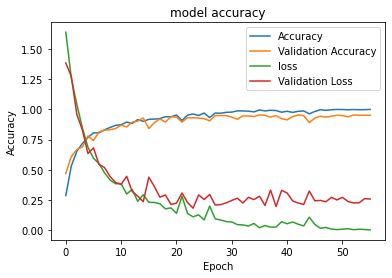

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [13]:
np.unique(labels)

array(['Clear Sky', 'Patterned Clouds', 'Thick Dark Clouds',
       'Thick White Clouds', 'Thin White Clouds', 'Veil Clouds'],
      dtype='<U18')

In [59]:
pretrained_model = load_model('./Models/SwimCat_Pretrain.h5')
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 64)        23296     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0

In [60]:
m = 0
for l in pretrained_model.layers:
    print(m, l)
    m += 1
    l.trainable = True

0 <keras.layers.convolutional.Conv2D object at 0x2ba994520>
1 <keras.layers.pooling.MaxPooling2D object at 0x2b5ff5670>
2 <keras.layers.convolutional.Conv2D object at 0x2ba9a7c70>
3 <keras.layers.pooling.MaxPooling2D object at 0x2ba99ab80>
4 <keras.layers.convolutional.Conv2D object at 0x2ba9ba940>
5 <keras.layers.convolutional.Conv2D object at 0x2ba99c430>
6 <keras.layers.pooling.MaxPooling2D object at 0x2ba99abe0>
7 <keras.layers.core.Flatten object at 0x2ba9a8400>
8 <keras.layers.core.Dropout object at 0x2ba9a8fa0>
9 <keras.layers.core.Dense object at 0x2ba9a8940>
10 <keras.layers.core.Dense object at 0x2ba9aab50>


In [61]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LayerNormalization

model = Sequential()

# paste pretrained layers 
model.add(pretrained_model.layers[0])
model.add(pretrained_model.layers[1])
model.add(pretrained_model.layers[2])
model.add(pretrained_model.layers[3])
model.add(pretrained_model.layers[4])
model.add(pretrained_model.layers[5])
model.add(pretrained_model.layers[6])

# Passing it to a dense layer
model.add(Flatten())

# Add Dropout to prevent overfitting
model.add(Dropout(0.5))

# Dense Layer
model.add(Dense(units=256, activation='relu'))

# Output Layer 
model.add(Dense(units=6, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 64)        23296     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

In [62]:
initial_lr = 5e-4

#compile model using accuracy to measure model performance
model.compile(loss='categorical_crossentropy', 
              optimizer= SGD(learning_rate=initial_lr,momentum=0.9), metrics=['accuracy'])

In [63]:
epochs = 200
batch_size = 8 # todo set to 64
steps_per_epoch = len(X_train)//batch_size
validation_steps = len(X_val)//batch_size

checkpoint = ModelCheckpoint("./Models/SecondStage_CloudObserverCCSN_Test4.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

# lr scheduler not used
lr_scheduler = LearningRateScheduler(StepDecay(initAlpha=initial_lr, factor=0.75, dropEvery=10), verbose=1)

In [64]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=epochs,
    batch_size=batch_size,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint, early, lr_scheduler])

Epoch 1/200

Epoch 00001: LearningRateScheduler setting learning rate to 0.0005.
  5/142 [>.............................] - ETA: 1s - loss: 3.1020 - accuracy: 0.1750 

2022-05-16 18:12:08.037390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


141/142 [============================>.] - ETA: 0s - loss: 1.7336 - accuracy: 0.3254

2022-05-16 18:12:11.804232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


142/142 [==============================] - 5s 31ms/step - loss: 1.7319 - accuracy: 0.3239 - val_loss: 1.5282 - val_accuracy: 0.3922

Epoch 00001: val_accuracy improved from -inf to 0.39224, saving model to ./Models/SecondStage_CloudObserverCCSN_Test4.h5
Epoch 2/200

Epoch 00002: LearningRateScheduler setting learning rate to 0.0005.
142/142 [==============================] - 3s 19ms/step - loss: 1.4629 - accuracy: 0.4106 - val_loss: 1.4643 - val_accuracy: 0.4152

Epoch 00002: val_accuracy improved from 0.39224 to 0.41523, saving model to ./Models/SecondStage_CloudObserverCCSN_Test4.h5
Epoch 3/200

Epoch 00003: LearningRateScheduler setting learning rate to 0.0005.
142/142 [==============================] - 3s 18ms/step - loss: 1.3595 - accuracy: 0.4451 - val_loss: 1.4307 - val_accuracy: 0.4138

Epoch 00003: val_accuracy did not improve from 0.41523
Epoch 4/200

Epoch 00004: LearningRateScheduler setting learning rate to 0.0005.
142/142 [==============================] - 3s 20ms/step - 

KeyboardInterrupt: 

In [31]:
# saving training history (for future visualization)
with open('./Models/SecondStage_CloudObserverCCSN_Test2.pkl', 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

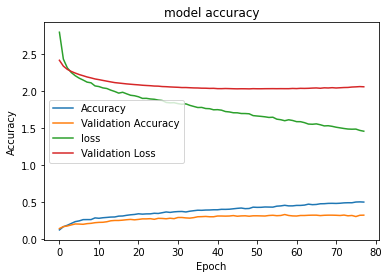

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [14]:
y_pred = model.predict(X_test)

2022-05-16 15:13:34.512280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [16]:
y_pred[0]

array([4.0759791e-02, 1.1736992e-02, 2.9820704e-03, 6.3627714e-04,
       7.3150476e-03, 4.9541391e-02, 1.0620956e-04, 8.5407775e-03,
       2.3909902e-02, 7.8802550e-01, 6.6446036e-02], dtype=float32)

In [22]:
def show_result(X_test, y_pred, idx, show_image=False):
    #labels = ['Sc', 'Ac', 'Ns', 'Ci', 'Cu', 'Cs', 'Ct', 'St', 'As', 'Cc', 'Cb']
    labels = ['Clear Sky', 'Patterned Clouds', 'Thick Dark Clouds',
       'Thick White Clouds', 'Thin White Clouds', 'Veil Clouds']
    
    """
        Ci = cirrus;
        Cs = cirrostratus;
        Cc = cirrocumulus;
        Ac = altocumulus;
        As = altostratus;
        Cu = cumulus;
        Cb = cumulonimbus;
        Ns = nimbostratus;
        Sc = stratocumulus;
        St = stratus;
        Ct = contrail.
    """
    
    if show_image:
        plt.imshow(X_test[idx])
        plt.show()
    
    print("The classifier says that the image shown is from class -> {}".format(labels[np.argmax(y_pred[idx])]))
    
    return labels[np.argmax(y_pred[idx])]

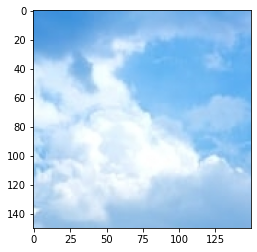

The classifier says that the image shown is from class -> Thick White Clouds


'Thick White Clouds'

In [30]:
show_result(X_test, y_pred, 8, show_image=True)

In [39]:
y_test.shape

(525, 6)

In [41]:
np.unique(labels)

array(['Clear Sky', 'Patterned Clouds', 'Thick Dark Clouds',
       'Thick White Clouds', 'Thin White Clouds', 'Veil Clouds'],
      dtype='<U18')

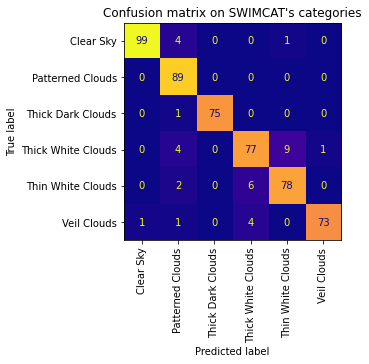

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from IPython.display import display, HTML

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=np.unique(labels))
disp.plot(colorbar=False, cmap='plasma', xticks_rotation='vertical')
plt.title("Confusion matrix on SWIMCAT's categories")
plt.show()

In [58]:
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=np.unique(labels))
print(report) 

                    precision    recall  f1-score   support

         Clear Sky       0.99      0.95      0.97       104
  Patterned Clouds       0.88      1.00      0.94        89
 Thick Dark Clouds       1.00      0.99      0.99        76
Thick White Clouds       0.89      0.85      0.87        91
 Thin White Clouds       0.89      0.91      0.90        86
       Veil Clouds       0.99      0.92      0.95        79

          accuracy                           0.94       525
         macro avg       0.94      0.94      0.94       525
      weighted avg       0.94      0.94      0.94       525



In [59]:
p_max = np.array([y_pred[i,v] for i,v in enumerate(y_test.argmax(axis=1))]) 
conformal_scores = 1. - p_max

alpha = 0.1
n = len(conformal_scores)
q_hat = np.quantile(conformal_scores, (n+1) * (1. - alpha) / n)

In [60]:
q_hat

0.15784574808393256

In [61]:
conformal_scores.shape

(525,)

The purpose of this work is to use a machine learning model (primarily a convolutional neural network) to distinguish between the 11 different classes or 'species' of clouds:

* Cirrus (Ci);
* Cirrostratus (Cs);
* Cirrocumulus (Cc);
* Altocumulus (Ac);
* Altostratus (As);
* Cumulus (Cu);
* Cumulonimbus (Cb);
* Nimbostratus (Ns);
* Stratocumulus (Sc);
* Stratus (St);
* Contrail (Ct).

In [63]:
#names = {0:'Sc', 1:'Ac', 2:'Ns', 3:'Ci', 4:'Cu', 5:'Cs', 6:'Ct', 7:'St', 8:'As', 9:'Cc', 10:'Cb'}
names = {0:'Clear Sky', 1:'Patterned Clouds', 2:'Thick Dark Clouds',
       3:'Thick White Clouds', 4:'Thin White Clouds', 5:'Veil Clouds'}

In [66]:
cont = 0.
N = 5
for i in range(0,N):
    sel = {j:k for j,k in enumerate(y_pred[i]) if k > (1. - q_hat)}
    if y_test[i].argmax() in sel:
        cont += 1.
    if len(sel) < 2:
        continue
    ax = plt.figure(figsize=(3,3))
    plt.imshow(X_test[i])
    print('No selected class' if len(sel) == 0 else {names[j]:sel[j] for j in sel.keys()})
    plt.show()

print("Theoretical Calibration = ",1.-alpha)
print("Emphirical Calibration of "+str(N)+" images = ",cont/N)

Theoretical Calibration =  0.9
Emphirical Calibration of 5 images =  1.0


In [68]:
from tqdm import tqdm
emph_cal = []
N = 525
for alpha in tqdm(np.arange(0.05,1.,0.05)):
    n = len(conformal_scores)
    q_hat = np.quantile(conformal_scores, (n+1) * (1. - alpha) / n)
    cont = 0.
    for i in range(0,N):
        sel = {j:k for j,k in enumerate(y_pred[i]) if k > (1. - q_hat)}
        if y_test[i].argmax() in sel:
            cont += 1.
    emph_cal += [cont]
emph_cal = np.array(emph_cal)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 246.25it/s]


In [69]:
emph_cal/N

array([0.95047619, 0.90095238, 0.85142857, 0.8       , 0.75047619,
       0.70095238, 0.65142857, 0.6       , 0.55047619, 0.50095238,
       0.45142857, 0.4       , 0.35047619, 0.30095238, 0.24952381,
       0.2       , 0.14095238, 0.08952381, 0.        ])

In [70]:
1-np.arange(0.05,1.,0.05)

array([0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.55, 0.5 , 0.45,
       0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 , 0.05])

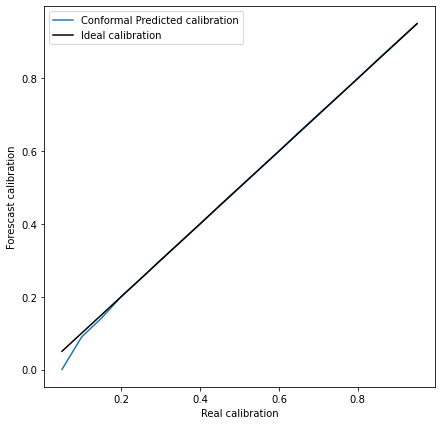

In [71]:
plt.figure(figsize=(7,7))
plt.plot(1-np.arange(0.05,1.,0.05),emph_cal/N,label='Conformal Predicted calibration')
plt.plot(1-np.arange(0.05,1.,0.05),1-np.arange(0.05,1.,0.05),color='black',label='Ideal calibration')
plt.ylabel('Forescast calibration')
plt.xlabel('Real calibration')
plt.legend()
plt.show()

In [72]:
path = "/Users/marcosplazagonzalez/Desktop/Ground-based_CloudClassification/Sc"

newN = 153
count=0
im_size=227
X_Sc = np.zeros((newN, im_size, im_size, 3))
y = np.zeros((newN, 11))

y[:,0] +=1


for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename == '.DS_Store': continue

        path = os.path.join(dirname, filename)

        im = imageio.imread(path)/255.
        X_Sc[count, :, :] = transform.resize(im, (im_size, im_size, 3), mode='symmetric', preserve_range=True)

        count +=1

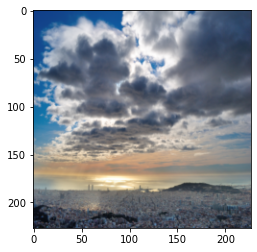

In [180]:
plt.imshow(X_Sc[7])

In [8]:
y_sc_pred = model.predict(X_Sc)
acc = np.sum(y_sc_pred[:,0]) / newN
print("Accuracy => {}".format(acc))

Accuracy => 0.26429227442523234


2022-05-02 22:21:04.778386: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-02 22:21:04.778558: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-02 22:21:04.807782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import f1_score
from IPython.display import display, HTML

matrix = confusion_matrix(y.argmax(axis=1), y_sc_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Sc', 'Ac', 'Ns', 'Ci', 'Cu', 'Cs', 'Ct', 'St', 'As', 'Cc', 'Cb'])
disp.plot(colorbar=False, cmap='plasma')
plt.show()

In [ ]:
display(HTML(matrix.to_html()))